In [1]:
%matplotlib inline

# Examples of drift for GEO4926

*2024-04-14, kaihc@met.no*

## Cases:

1. **With Stokes drift advection** and no effect of turbulent mixing, 
   i.e. constant depth for each particles throughout.
1. **No Stokes drift advection** and no effect of turbulent mixing, 
   i.e. constant depth for each particles throughout.
1. With Stokes drift advection and **turbulent mixing** (compare with case 1), 
   i.e. each particles moves freely in the vertical with **no buoyancy**.
1. With Stokes drift advection and turbulent mixing, 
   now with an additional **terminal rise velocity added**.
1. **No Stokes drift advection** but with turbulent mixing, 
   with an additional **terminal rise velocity added**.

In [2]:
import numpy as np
from datetime import datetime, timedelta
from opendrift.readers import reader_netCDF_CF_generic
from opendrift.readers import reader_ROMS_native, reader_netCDF_CF_generic
from opendrift.models.oceandrift import OceanDrift

In [3]:
# Initialise cases
loglev = 20 # Set loglevel to 0 for debug information
o1 = OceanDrift(loglevel=loglev)  
o2 = OceanDrift(loglevel=loglev) 
o3 = OceanDrift(loglevel=loglev) 
o4 = OceanDrift(loglevel=loglev) 
o5 = OceanDrift(loglevel=loglev) 

# Creating and adding reader for Norkyst current dataset and WAM wave data set
norkyst = reader_netCDF_CF_generic.Reader('https://thredds.met.no/thredds/dodsC/sea/norkyst800m/1h/aggregate_be')
wam = reader_netCDF_CF_generic.Reader('https://thredds.met.no/thredds/dodsC/sea/mywavewam4/mywavewam4_be')


10:00:18 INFO    opendrift.models.basemodel:532: OpenDriftSimulation initialised (version 1.10.6 / v1.10.6-8-g8b4ee8b-dirty)
10:00:18 INFO    opendrift.models.basemodel:532: OpenDriftSimulation initialised (version 1.10.6 / v1.10.6-8-g8b4ee8b-dirty)
10:00:18 INFO    opendrift.models.basemodel:532: OpenDriftSimulation initialised (version 1.10.6 / v1.10.6-8-g8b4ee8b-dirty)
10:00:19 INFO    opendrift.models.basemodel:532: OpenDriftSimulation initialised (version 1.10.6 / v1.10.6-8-g8b4ee8b-dirty)
10:00:19 INFO    opendrift.models.basemodel:532: OpenDriftSimulation initialised (version 1.10.6 / v1.10.6-8-g8b4ee8b-dirty)
10:00:19 INFO    opendrift.readers.reader_netCDF_CF_generic:138: Opening dataset: https://thredds.met.no/thredds/dodsC/sea/norkyst800m/1h/aggregate_be
10:00:23 INFO    opendrift.readers.reader_netCDF_CF_generic:138: Opening dataset: https://thredds.met.no/thredds/dodsC/sea/mywavewam4/mywavewam4_be


In [4]:
# Initial position
ini_lat = 58.9
ini_lon = 10.6

# Number of particles and their depth distribution
N = 5
zvec = np.linspace(0, -2.5, N)

In [5]:
# First simulation: With Stokes drift advection and no effect of turbulent mixing, 
# i.e. constant depth for each particles throughout.

# Add readers for input data
o1.add_reader([norkyst,wam])

# Configurations
o1.set_config('drift:vertical_mixing', False)
o1.set_config('drift:stokes_drift', True)

# Initialize and run
o1.seed_elements(lon=ini_lon, lat=ini_lat, radius=0, number=N,
                z=zvec, time=datetime.utcnow(), wind_drift_factor=0.0, terminal_velocity=0.0)
o1.run(duration=timedelta(hours=24), time_step=600)

10:00:26 INFO    opendrift.models.basemodel:2579: Fallback values will be used for the following variables which have no readers: 
10:00:26 INFO    opendrift.models.basemodel:2582: 	ocean_vertical_diffusivity: 0.000000
10:00:26 INFO    opendrift.models.basemodel:2582: 	surface_downward_x_stress: 0.000000
10:00:26 INFO    opendrift.models.basemodel:2582: 	surface_downward_y_stress: 0.000000
10:00:26 INFO    opendrift.models.basemodel:2582: 	turbulent_kinetic_energy: 0.000000
10:00:26 INFO    opendrift.models.basemodel:2582: 	turbulent_generic_length_scale: 0.000000
10:00:26 INFO    opendrift.models.basemodel:2582: 	ocean_mixed_layer_thickness: 50.000000
10:00:26 INFO    opendrift.models.basemodel:2741: Adding a dynamical landmask with max. priority based on assumed maximum speed of 1 m/s. Adding a customised landmask may be faster...
10:00:30 INFO    opendrift.models.basemodel:1689: Using existing reader for land_binary_mask
10:00:30 INFO    opendrift.models.basemodel:1701: All points a

In [6]:
# Second simulation: No Stokes drift advection and no effect of turbulent mixing, 
# i.e. constant depth for each particles throughout.

# Add readers for input data
o2.add_reader([norkyst,wam])

# Configurations
o2.set_config('drift:vertical_mixing', False)
o2.set_config('drift:stokes_drift', False)

# Initialize and run
o2.seed_elements(lon=ini_lon, lat=ini_lat, radius=0, number=N,
                z=zvec, time=datetime.utcnow(), wind_drift_factor=0.0, terminal_velocity=0.0)
o2.run(duration=timedelta(hours=24), time_step=600)

10:00:42 INFO    opendrift.models.basemodel:2579: Fallback values will be used for the following variables which have no readers: 
10:00:42 INFO    opendrift.models.basemodel:2582: 	ocean_vertical_diffusivity: 0.000000
10:00:42 INFO    opendrift.models.basemodel:2582: 	surface_downward_x_stress: 0.000000
10:00:42 INFO    opendrift.models.basemodel:2582: 	surface_downward_y_stress: 0.000000
10:00:42 INFO    opendrift.models.basemodel:2582: 	turbulent_kinetic_energy: 0.000000
10:00:42 INFO    opendrift.models.basemodel:2582: 	turbulent_generic_length_scale: 0.000000
10:00:42 INFO    opendrift.models.basemodel:2582: 	ocean_mixed_layer_thickness: 50.000000
10:00:42 INFO    opendrift.models.basemodel:2741: Adding a dynamical landmask with max. priority based on assumed maximum speed of 1 m/s. Adding a customised landmask may be faster...
10:00:42 INFO    opendrift.models.basemodel:1689: Using existing reader for land_binary_mask
10:00:42 INFO    opendrift.models.basemodel:1701: All points a

In [7]:
# Third simulation: With Stokes drift advection and turbulent mixing (compare with case 1), 
# i.e. each particles moves freely in the vertical with no buoyancy.

# Add readers for input data
o3.add_reader([norkyst,wam])

# Configurations
o3.set_config('drift:vertical_mixing', True)
o3.set_config('drift:stokes_drift', True)

# Initialize and run
o3.seed_elements(lon=ini_lon, lat=ini_lat, radius=0, number=N,
                z=zvec, time=datetime.utcnow(), wind_drift_factor=0.0, terminal_velocity=0.0)
o3.run(duration=timedelta(hours=24), time_step=600)

10:00:55 INFO    opendrift.models.basemodel:2579: Fallback values will be used for the following variables which have no readers: 
10:00:55 INFO    opendrift.models.basemodel:2582: 	ocean_vertical_diffusivity: 0.000000
10:00:55 INFO    opendrift.models.basemodel:2582: 	surface_downward_x_stress: 0.000000
10:00:55 INFO    opendrift.models.basemodel:2582: 	surface_downward_y_stress: 0.000000
10:00:55 INFO    opendrift.models.basemodel:2582: 	turbulent_kinetic_energy: 0.000000
10:00:55 INFO    opendrift.models.basemodel:2582: 	turbulent_generic_length_scale: 0.000000
10:00:55 INFO    opendrift.models.basemodel:2582: 	ocean_mixed_layer_thickness: 50.000000
10:00:55 INFO    opendrift.models.basemodel:2741: Adding a dynamical landmask with max. priority based on assumed maximum speed of 1 m/s. Adding a customised landmask may be faster...
10:00:55 INFO    opendrift.models.basemodel:1689: Using existing reader for land_binary_mask
10:00:55 INFO    opendrift.models.basemodel:1701: All points a

In [8]:
# Fourth simulation: With Stokes drift advection and turbulent mixing, 
# now with an additional terminal rise velocity added.

# Add readers for input data
o4.add_reader([norkyst,wam])

# Configurations
o4.set_config('drift:vertical_mixing', True)
o4.set_config('drift:stokes_drift', True)

# Initialize and run, rise velocity of 5 mm/s.
o4.seed_elements(lon=ini_lon, lat=ini_lat, radius=0, number=N,
                z=zvec, time=datetime.utcnow(), wind_drift_factor=0.0, terminal_velocity=0.005)
o4.run(duration=timedelta(hours=24), time_step=600)

10:01:10 INFO    opendrift.models.basemodel:2579: Fallback values will be used for the following variables which have no readers: 
10:01:10 INFO    opendrift.models.basemodel:2582: 	ocean_vertical_diffusivity: 0.000000
10:01:10 INFO    opendrift.models.basemodel:2582: 	surface_downward_x_stress: 0.000000
10:01:10 INFO    opendrift.models.basemodel:2582: 	surface_downward_y_stress: 0.000000
10:01:10 INFO    opendrift.models.basemodel:2582: 	turbulent_kinetic_energy: 0.000000
10:01:10 INFO    opendrift.models.basemodel:2582: 	turbulent_generic_length_scale: 0.000000
10:01:10 INFO    opendrift.models.basemodel:2582: 	ocean_mixed_layer_thickness: 50.000000
10:01:10 INFO    opendrift.models.basemodel:2741: Adding a dynamical landmask with max. priority based on assumed maximum speed of 1 m/s. Adding a customised landmask may be faster...
10:01:10 INFO    opendrift.models.basemodel:1689: Using existing reader for land_binary_mask
10:01:10 INFO    opendrift.models.basemodel:1701: All points a

In [9]:
# Fifth simulation: No Stokes drift advection but with turbulent mixing, 
# with an additional terminal rise velocity added.

# Add readers for input data
o5.add_reader([norkyst,wam])

# Configurations
o5.set_config('drift:vertical_mixing', True)
o5.set_config('drift:stokes_drift', False)

# Initialize and run, rise velocity of 5 mm/s.
o5.seed_elements(lon=ini_lon, lat=ini_lat, radius=0, number=N,
                z=zvec, time=datetime.utcnow(), wind_drift_factor=0.0, terminal_velocity=0.005)
o5.run(duration=timedelta(hours=24), time_step=600)

10:01:26 INFO    opendrift.models.basemodel:2579: Fallback values will be used for the following variables which have no readers: 
10:01:26 INFO    opendrift.models.basemodel:2582: 	ocean_vertical_diffusivity: 0.000000
10:01:26 INFO    opendrift.models.basemodel:2582: 	surface_downward_x_stress: 0.000000
10:01:26 INFO    opendrift.models.basemodel:2582: 	surface_downward_y_stress: 0.000000
10:01:26 INFO    opendrift.models.basemodel:2582: 	turbulent_kinetic_energy: 0.000000
10:01:26 INFO    opendrift.models.basemodel:2582: 	turbulent_generic_length_scale: 0.000000
10:01:26 INFO    opendrift.models.basemodel:2582: 	ocean_mixed_layer_thickness: 50.000000
10:01:26 INFO    opendrift.models.basemodel:2741: Adding a dynamical landmask with max. priority based on assumed maximum speed of 1 m/s. Adding a customised landmask may be faster...
10:01:26 INFO    opendrift.models.basemodel:1689: Using existing reader for land_binary_mask
10:01:26 INFO    opendrift.models.basemodel:1701: All points a

10:01:42 WARNING opendrift.models.basemodel:3214: Plotting fast. This will make your plots less accurate.


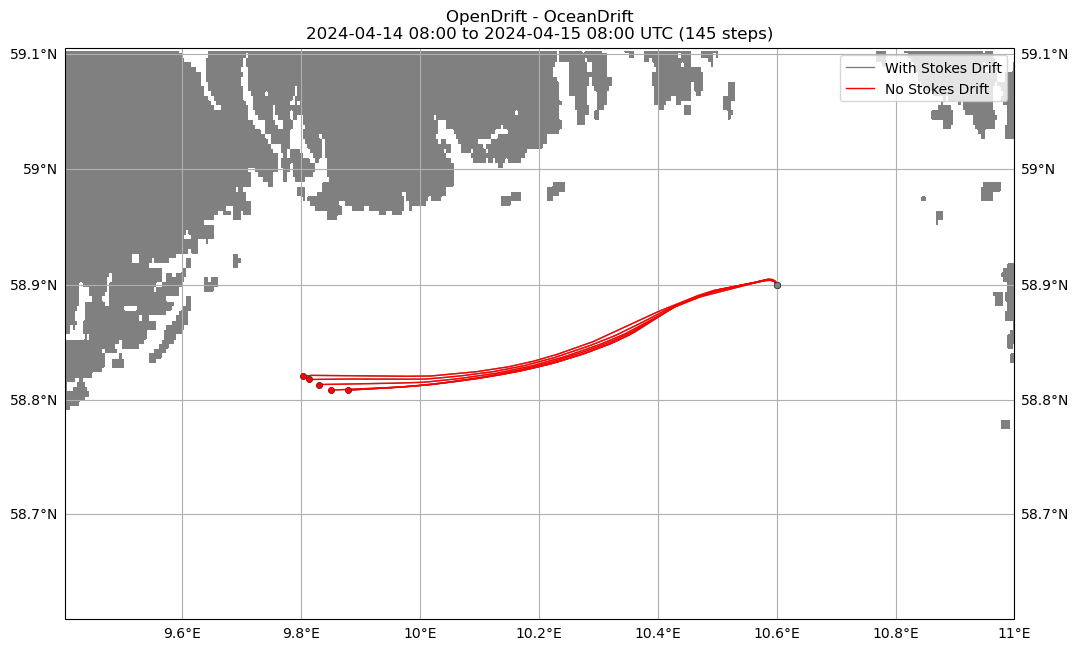

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2024-04-14 08:00 to 2024-04-15 08:00 UTC (145 steps)'}>,
 <Figure size 1100x661.519 with 1 Axes>)

In [10]:
# Plot differences between case 1 and 2:
o1.plot(compare=o2, fast=True, legend=['With Stokes Drift', 'No Stokes Drift'])

10:01:42 WARNING opendrift.models.basemodel:3214: Plotting fast. This will make your plots less accurate.


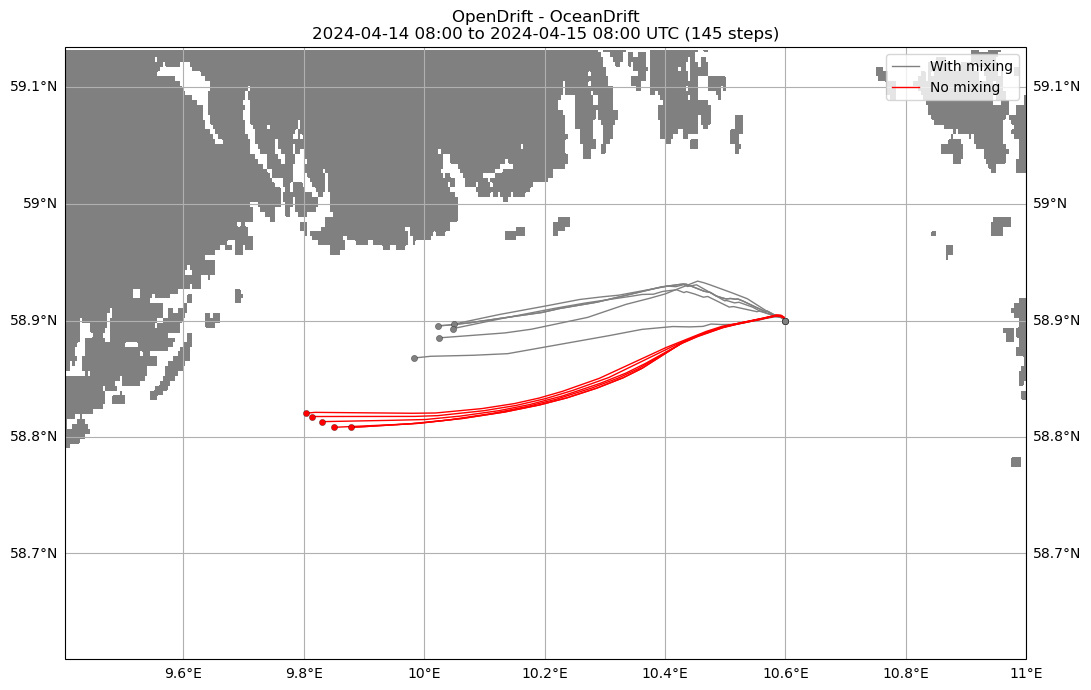

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2024-04-14 08:00 to 2024-04-15 08:00 UTC (145 steps)'}>,
 <Figure size 1100x700.572 with 1 Axes>)

In [11]:
# Plot differences between case 1 and 3:
o3.plot(compare=o1, fast=True, legend=['With mixing', 'No mixing'])

10:01:43 WARNING opendrift.models.basemodel:3214: Plotting fast. This will make your plots less accurate.


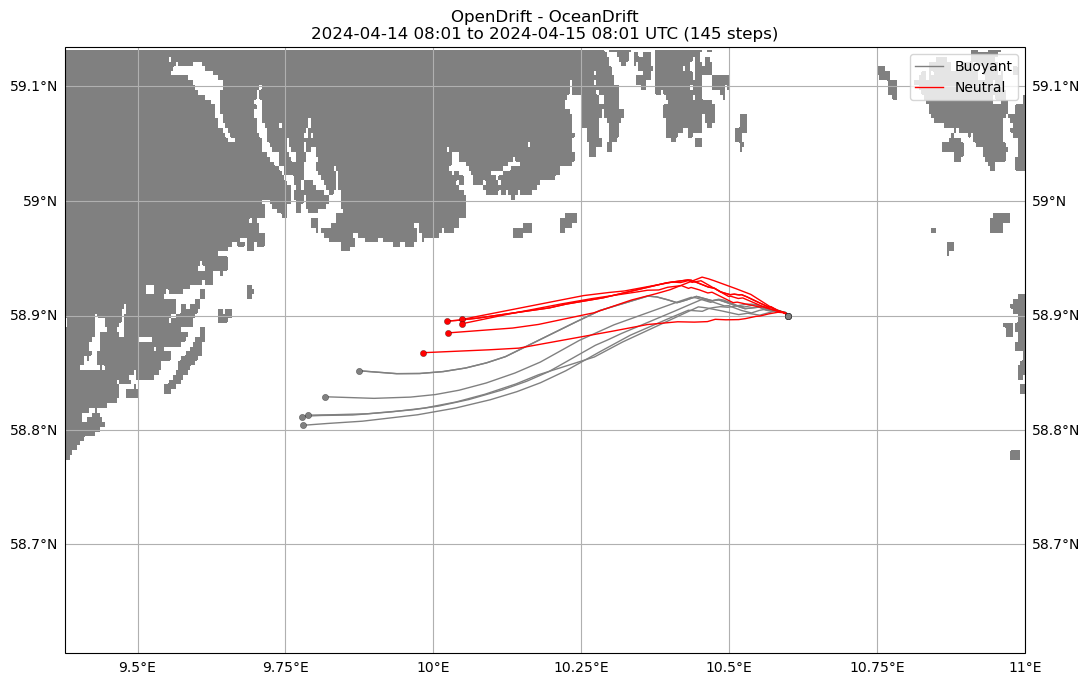

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2024-04-14 08:01 to 2024-04-15 08:01 UTC (145 steps)'}>,
 <Figure size 1100x694.55 with 1 Axes>)

In [12]:
# Plot differences between case 3 and 4:
o4.plot(compare=o3, fast=True, legend=['Buoyant', 'Neutral'])

10:01:44 WARNING opendrift.models.basemodel:3214: Plotting fast. This will make your plots less accurate.


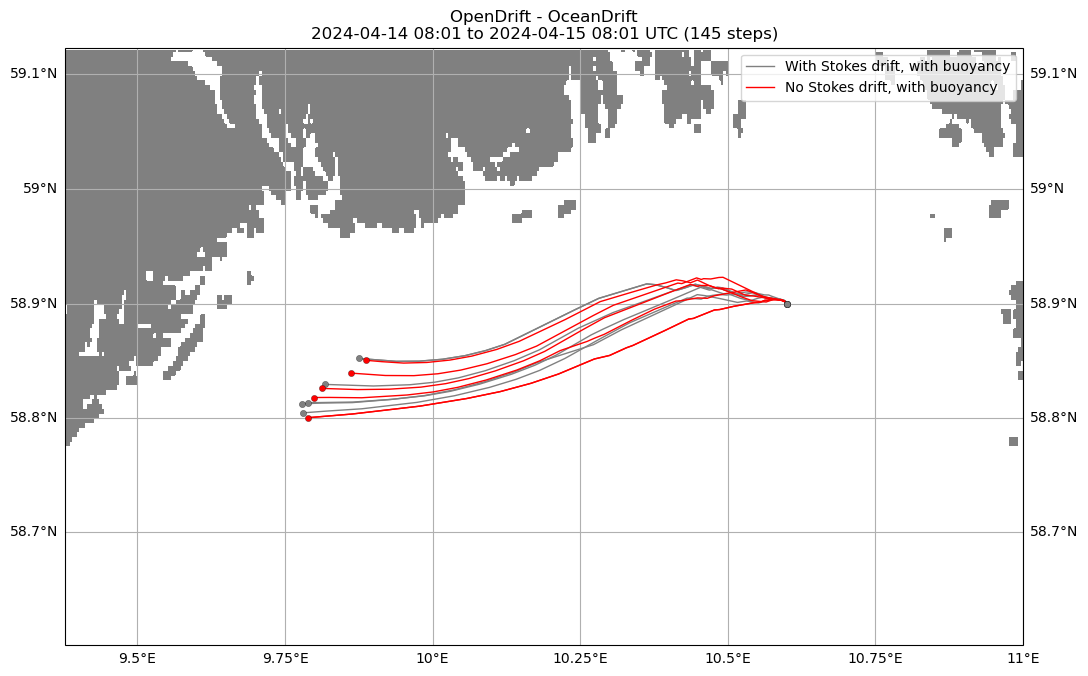

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2024-04-14 08:01 to 2024-04-15 08:01 UTC (145 steps)'}>,
 <Figure size 1100x686.056 with 1 Axes>)

In [13]:
# Plot differences between case 4 and 5.
o4.plot(compare=o5, fast=True, legend=['With Stokes drift, with buoyancy', 'No Stokes drift, with buoyancy'])

10:01:44 WARNING opendrift.models.basemodel:3214: Plotting fast. This will make your plots less accurate.


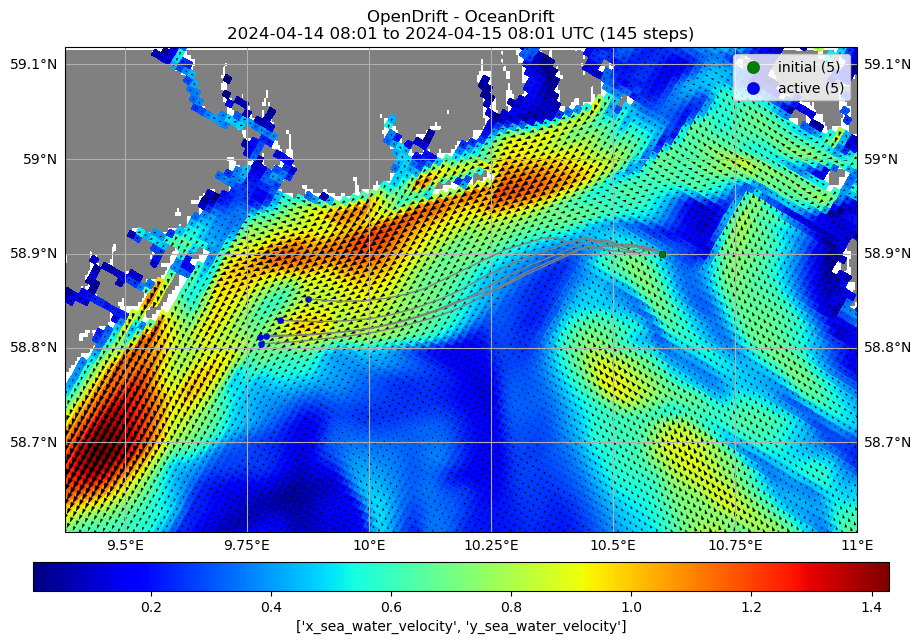

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2024-04-14 08:01 to 2024-04-15 08:01 UTC (145 steps)'}>,
 <Figure size 1100x673.378 with 2 Axes>)

In [14]:
# Plot background currents
o4.plot(fast=True, background=['x_sea_water_velocity', 'y_sea_water_velocity'])

10:01:52 WARNING opendrift.models.basemodel:3214: Plotting fast. This will make your plots less accurate.


VariableNotCoveredError: Variable not available: sea_surface_wave_stokes_drift_x_velocity
Available parameters are: ['land_binary_mask']

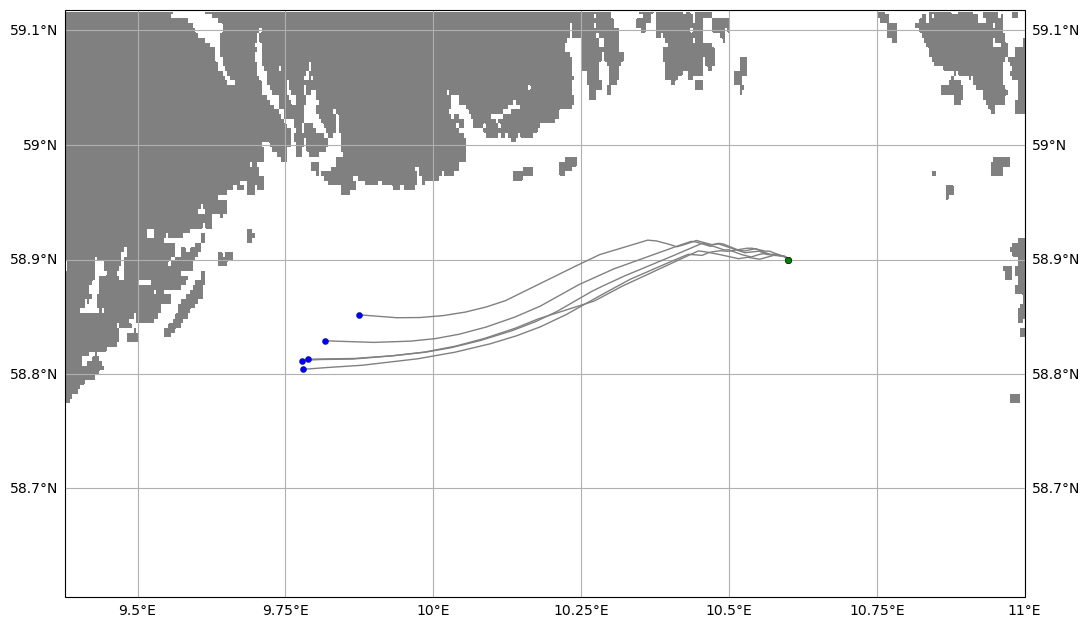

In [15]:
# Plot background Stokes drift 
o4.plot(fast=True, background=['sea_surface_wave_stokes_drift_x_velocity', 'sea_surface_wave_stokes_drift_y_velocity'])